In [2]:
import os

images = os.listdir("drone_tracking_dataset_yolo_format/train/images")
sorted_images = sorted(images, key=lambda x: int(x.split("_")[-1].split(".")[0]))
sorted_images = [f"drone_tracking_dataset_yolo_format/train/images/{image}" for image in sorted_images]

def get_label_path(image_path: str) -> str:
    return image_path.replace("images", "labels").replace(".jpg", ".txt")



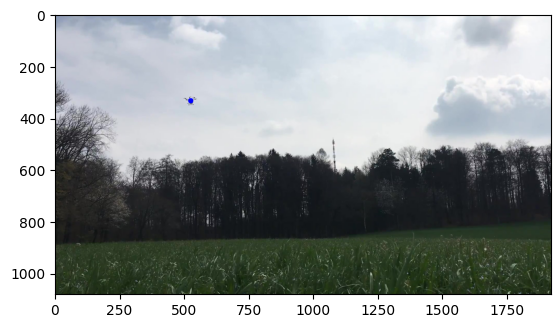

In [9]:
from typing import Tuple
import cv2

import matplotlib.pyplot as plt

def read_label(label_path: str) -> Tuple[float, float]:
    with open(label_path, 'r') as file:
        line = file.readline()
        _, x, y, _, _ = map(float, line.split())
    return x, y

def plot_image_and_center(image_path: str, label_path: str):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    label = read_label(label_path)
    cv2.circle(image, (int(label[0] * width), int(label[1] * height)), 10, (0, 0, 255), -1)
    plt.imshow(image)
    plt.show()
    
image_path = sorted_images[1000]
label_path = get_label_path(image_path)
plot_image_and_center(image_path, label_path)
    


In [4]:
image_path

'dataset4_cam0_frame_0001.jpg'

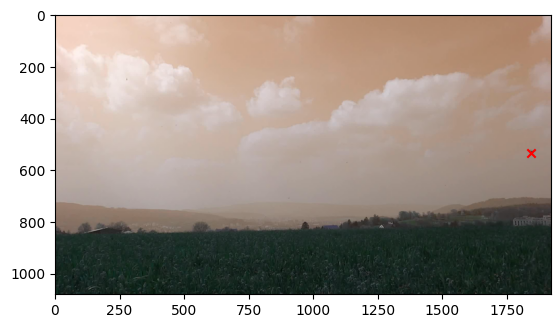